In [42]:
using Plots
using CSV
using DataFrames
using CatanLearning


In [43]:
tourneys_dir = "/home/bryan/Projects/Catan/CatanLearning.jl/models"
tournament_id = 99313

root_dir = joinpath(tourneys_dir, "tournament_$tournament_id")

"/home/bryan/Projects/Catan/CatanLearning.jl/models/tournament_99313"

In [44]:
all_features = CatanLearning.get_features()
features = CatanLearning.filter_bad_features(all_features)
weight_labels = [f[1] for f in features]

27-element Vector{Symbol}:
 :CountSettlement
 :CountTotalSettlement
 :CountCity
 :CountRoad
 :MaxRoadLength
 :SumWoodDiceWeight
 :SumBrickDiceWeight
 :SumPastureDiceWeight
 :SumStoneDiceWeight
 :SumGrainDiceWeight
 ⋮
 :CountTotalStone
 :CountTotalGrain
 :CountDevCardsKnight
 :CountDevCardsMonopoly
 :CountDevCardsYearOfPlenty
 :CountDevCardsRoadBuilding
 :CountDevCardsVictoryPoint
 :HasLargestArmy
 :HasLongestRoad

In [45]:
(root, dirs, files) = collect(walkdir(root_dir))[1]
teams = [Symbol(replace(f, r"\d*_(.*)\.csv" => s"\1")) for f in files[1:4]]

println(teams)
num_epochs = convert(Int, length(files) / length(teams))
println(num_epochs)
println(files)

[:blue, :cyan, :green, :yellow]
25
["10_blue.csv", "10_cyan.csv", "10_green.csv", "10_yellow.csv", "11_blue.csv", "11_cyan.csv", "11_green.csv", "11_yellow.csv", "12_blue.csv", "12_cyan.csv", "12_green.csv", "12_yellow.csv", "13_blue.csv", "13_cyan.csv", "13_green.csv", "13_yellow.csv", "14_blue.csv", "14_cyan.csv", "14_green.csv", "14_yellow.csv", "15_blue.csv", "15_cyan.csv", "15_green.csv", "15_yellow.csv", "16_blue.csv", "16_cyan.csv", "16_green.csv", "16_yellow.csv", "17_blue.csv", "17_cyan.csv", "17_green.csv", "17_yellow.csv", "18_blue.csv", "18_cyan.csv", "18_green.csv", "18_yellow.csv", "19_blue.csv", "19_cyan.csv", "19_green.csv", "19_yellow.csv", "1_blue.csv", "1_cyan.csv", "1_green.csv", "1_yellow.csv", "20_blue.csv", "20_cyan.csv", "20_green.csv", "20_yellow.csv", "21_blue.csv", "21_cyan.csv", "21_green.csv", "21_yellow.csv", "22_blue.csv", "22_cyan.csv", "22_green.csv", "22_yellow.csv", "23_blue.csv", "23_cyan.csv", "23_green.csv", "23_yellow.csv", "24_blue.csv", "24_cyan

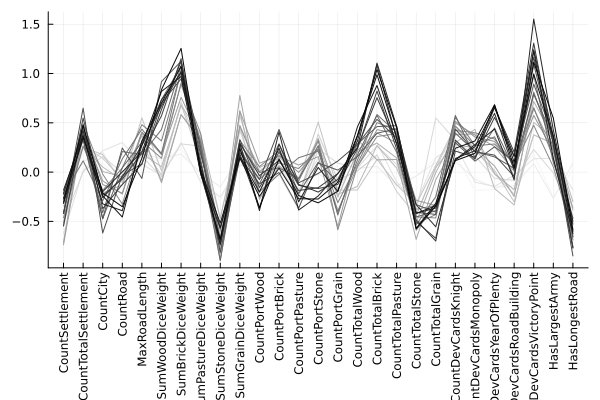

In [60]:
fname(k, t::Symbol) = joinpath(root_dir, "$(k)_$t.csv")
plt = plot()
d = Dict()
for k=1:num_epochs
    for t = teams[1:1]
        #println("plotting epoch $k / $num_epochs - $t")
        weights = CSV.read(fname(k,t), DataFrame)[!,:Weights]
        d[(k,t)] = weights
        #plot!(weights; color = "Gray$(2*k)")
        c = RGB(repeat([1-(10*k/255)],3)...)
        
        #plot!(weights; color = c)
        plot!(weights, xticks = (1:length(weights), [String(s) for s in weight_labels]), legend=false; xrotation = 90, color = c)
        #plot!(weights)
    end
end
plt


In [68]:
# See which label had the biggest change over time
change = []
team = teams[1]
for (i,label) in enumerate(weight_labels)
    first_val = d[(1, team)][i]
    last_val = d[(num_epochs, team)][i]
    difference = last_val - first_val
    push!(change, (label, difference))
end

top_changes = sort!(change, by=t -> -t[2])
for x in top_changes
    println(x)
end


(:SumBrickDiceWeight, 1.0161690713590597)
(:CountDevCardsVictoryPoint, 0.9359132457217132)
(:CountTotalBrick, 0.8935300221523845)
(:CountDevCardsYearOfPlenty, 0.8573487644463611)
(:HasLargestArmy, 0.803759637429921)
(:SumWoodDiceWeight, 0.7267491773124577)
(:CountTotalPasture, 0.587572126882853)
(:CountDevCardsMonopoly, 0.37659001269309866)
(:CountTotalWood, 0.3376294001438344)
(:CountTotalSettlement, 0.27236634358571826)
(:CountDevCardsRoadBuilding, 0.09226893200540998)
(:SumGrainDiceWeight, 0.08402964097956189)
(:CountPortBrick, 0.07749107842947797)
(:SumPastureDiceWeight, 0.05365305269035377)
(:CountPortGrain, 0.04126149616410624)
(:MaxRoadLength, -0.0058891830531027645)
(:CountPortPasture, -0.029026093029648842)
(:CountSettlement, -0.05042359835001037)
(:CountDevCardsKnight, -0.060155806205394596)
(:CountRoad, -0.24932740491084787)
(:CountCity, -0.3016769649885942)
(:CountPortWood, -0.3491235360157038)
(:SumStoneDiceWeight, -0.39002413056588525)
(:CountTotalGrain, -0.48993707616464